In [1]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, log_loss
SEED = 42

In [2]:

df = pd.read_csv(r"C:\Users\shiva\jupyter lab\assigment\archive\WA_Fn-UseC_-HR-Employee-Attrition.csv") 
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
    # type of data, how many missing values/null fields
    df.info()
    df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

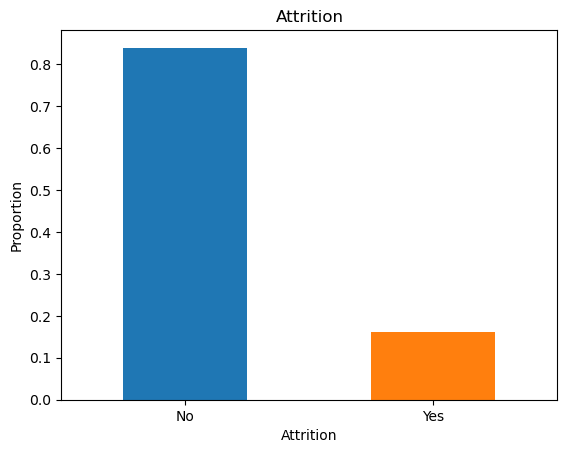

In [6]:
# Calculate the proportion of Attrition classes
attrition_counts = df['Attrition'].value_counts(normalize=True)

# Plotting the bar plot
attrition_counts.plot(kind='bar', color=['C0', 'C1'])
plt.title('Attrition')
plt.xlabel('Attrition')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability
plt.show()


20.704225352112676
4.146589863793162


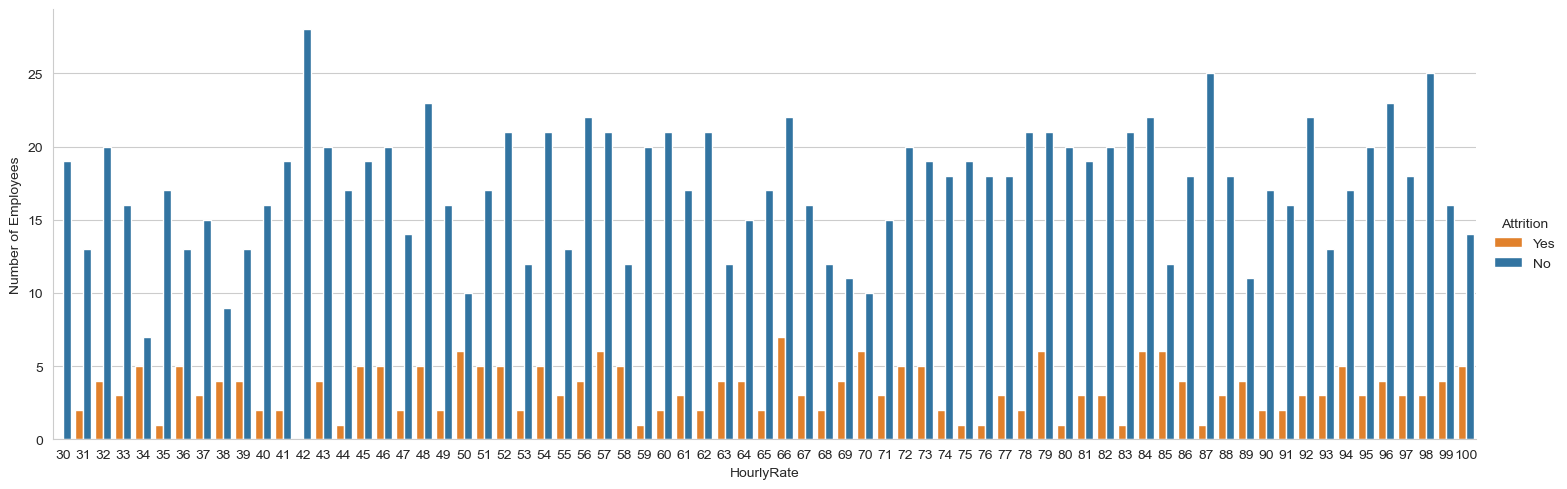

In [8]:
# Calculate the average count of 20 employees in each HourlyRate class from 30 to 100
print(df.HourlyRate.value_counts().mean())
print(np.std(df.HourlyRate.value_counts()))

# Set seaborn style to 'whitegrid'
sns.set_style('whitegrid')

# Plotting the categorical plot (catplot) to visualize employee distribution by HourlyRate with distinct Attrition classes
sns.catplot(x='HourlyRate', data=df, aspect=3, kind='count', hue='Attrition', palette=['C1', 'C0'])
plt.ylabel('Number of Employees')  # Set y-axis label
plt.show()


In [9]:
df['EduField_Dept'] = 0
for i, row in df.iterrows():
    if row['EducationField']=='Human Resources' and row['Department']=='Human Resources':
        df['EduField_Dept'][i] = 1
    elif row['EducationField']=='Life Sciences' and row['Department']=='Sales':
        df['EduField_Dept'][i] = 2
    elif row['EducationField']=='Life Sciences' and row['Department']=='Research & Development':
        df['EduField_Dept'][i] = 1
    elif row['EducationField']=='Medical' and row['Department']=='Sales':
        df['EduField_Dept'][i] = 2
    elif row['EducationField']=='Medical' and row['Department']=='Research & Development':
        df['EduField_Dept'][i] = 1
    elif row['EducationField']=='Technical Degree' and row['Department']=='Sales':
        df['EduField_Dept'][i] = 2
    elif row['EducationField']=='Technical Degree' and row['Department']=='Research & Development':
        df['EduField_Dept'][i] = 1
    elif row['EducationField']=='Marketing' and row['Department']=='Sales':
        df['EduField_Dept'][i] = 1
        
# for index, row in df.iterrows():
#     print(row['EducationField'], '->', row['Department'], '=>', row['EduField_Dept'])

In [10]:
# to define new features (divide by something+1 to prevent division by zero)
df['Job_Coy'] = df['JobLevel'] / (df['YearsAtCompany'] + 1)
df['Edu_Age_TotalWorking'] = df['Education'] / (df['Age'] + df['TotalWorkingYears'])
df['CurrMgr_Coy'] = df['YearsWithCurrManager'] / (df['YearsAtCompany'] + 1)
df['CurrRole_CurrMgr'] = df['YearsInCurrentRole'] / (df['YearsWithCurrManager'] + 1)
# df

In [11]:
# to check for categorical type columns and each unique values
for col in df.select_dtypes(['object']).columns:
    print(col, ':', sorted(df[col].unique()))

Attrition : ['No', 'Yes']
BusinessTravel : ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Department : ['Human Resources', 'Research & Development', 'Sales']
EducationField : ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
Gender : ['Female', 'Male']
JobRole : ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
MaritalStatus : ['Divorced', 'Married', 'Single']
Over18 : ['Y']
OverTime : ['No', 'Yes']


In [12]:
# to drop useless features
df = df.drop(columns=['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours'])

# label encoding to clean up categorical data
categorical_data = {
    'Attrition': {'No':0, 'Yes':1}, 
    'BusinessTravel': {'Non-Travel':0, 'Travel_Frequently':1, 'Travel_Rarely':2}, 
    'Department': {'Human Resources':0, 'Research & Development':1, 'Sales':2}, 
    'EducationField': {'Human Resources':0, 'Life Sciences':1, 'Marketing':2, 'Medical':3, 'Technical Degree':4, 'Other':5}, 
    'Gender': {'Female':0, 'Male':0}, 
    'JobRole': {'Healthcare Representative':0, 'Human Resources':1, 'Laboratory Technician':2, 'Manager':3, 'Manufacturing Director':4, 'Research Director':5, 'Research Scientist':6, 'Sales Executive':7, 'Sales Representative':8}, 
    'MaritalStatus': {'Divorced':0, 'Single':1, 'Married':2}, 
    #'Over18': {'Y':1}, 
    'OverTime': {'No':0, 'Yes':1}    }
df = df.replace(categorical_data)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EduField_Dept,Job_Coy,Edu_Age_TotalWorking,CurrMgr_Coy,CurrRole_CurrMgr
0,41,1,2,1102,2,1,2,1,2,0,...,1,6,4,0,5,2,0.285714,0.040816,0.714286,0.666667
1,49,0,1,279,1,8,1,1,3,0,...,3,10,7,1,7,1,0.181818,0.016949,0.636364,0.875000
2,37,1,2,1373,1,2,2,5,4,0,...,3,0,0,0,0,0,1.000000,0.045455,0.000000,0.000000
3,33,0,1,1392,1,3,4,1,4,0,...,3,8,7,3,0,1,0.111111,0.097561,0.000000,7.000000
4,27,0,2,591,1,2,1,3,1,0,...,3,2,2,2,2,1,0.333333,0.030303,0.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,0,...,3,5,2,0,3,1,0.333333,0.037736,0.500000,0.500000
1466,39,0,2,613,1,6,1,3,4,0,...,3,7,7,1,7,1,0.375000,0.020833,0.875000,0.875000
1467,27,0,2,155,1,4,3,1,2,0,...,3,6,2,0,3,1,0.285714,0.090909,0.428571,0.500000
1468,49,0,1,1023,2,2,3,3,4,0,...,2,9,6,0,8,2,0.200000,0.045455,0.800000,0.666667


Top 10 Features: ['OverTime', 'MonthlyIncome', 'TotalWorkingYears', 'Age', 'StockOptionLevel', 'YearsAtCompany', 'Edu_Age_TotalWorking', 'JobLevel', 'YearsWithCurrManager', 'CurrMgr_Coy']


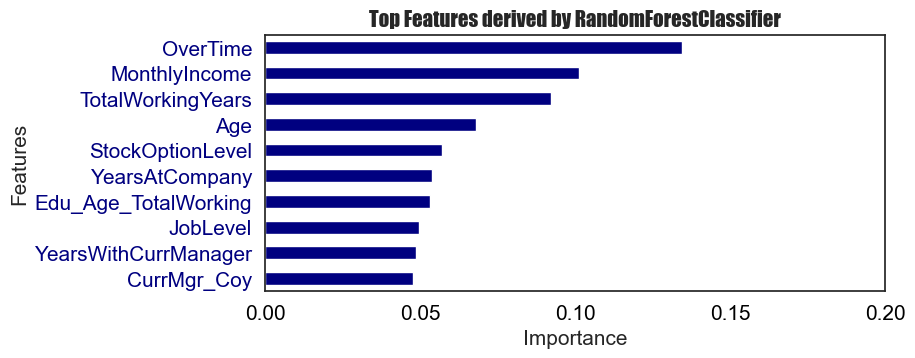

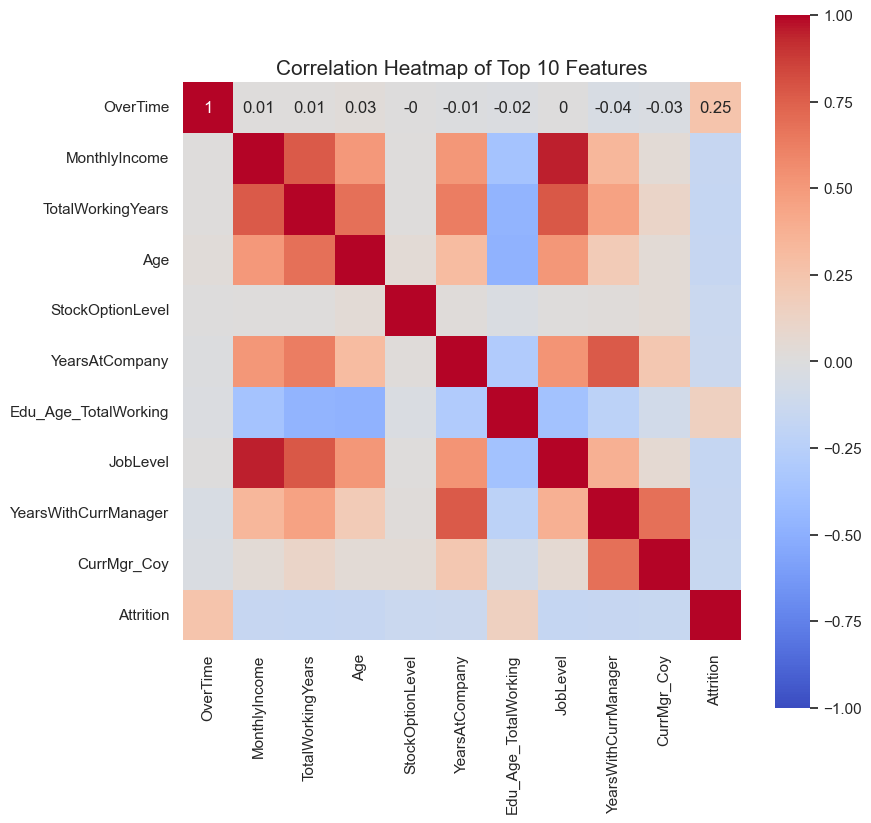

In [14]:
# Define feature X and target y dataset
X, y = df.drop('Attrition', axis=1), df['Attrition']

# Use RandomForestClassifier to look for important key features
n = 10    # specify n (top n features)
rfc = RandomForestClassifier(random_state=SEED, n_estimators=200, max_depth=3)
rfc_model = rfc.fit(X, y)

# Plotting feature importance using bar plot
pd.Series(rfc_model.feature_importances_, index=X.columns).nlargest(n).plot(kind='barh', 
    figsize=[8, n/3], color='navy').invert_yaxis()    # most important feature is on top, i.e., descending order

# Set ticks for x-axis
ticks_x = np.linspace(0, 0.2, 5)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=15, color='black')

# Set ticks for y-axis
plt.yticks(size=15, color='navy')

# Set title and labels
plt.title('Top Features derived by RandomForestClassifier', family='fantasy', size=15)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Importance', fontsize=15)

# Print top 10 features
top10_features = pd.Series(rfc_model.feature_importances_, index=X.columns).nlargest(10)
print('Top 10 Features:', list(top10_features.index))

# Check for correlation between top 10 features
X = df.loc[:, top10_features.index]
y = df['Attrition']
df_top10 = X.join(y)

# Correlation matrix heatmap visualization
plt.figure(figsize=(9, 9))
sns.heatmap(df_top10.corr().round(2), annot=True, annot_kws={"size": 12}, square=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Top 10 Features', size=15)
plt.show()


In [15]:
# drop highly correlated features: JobLevel & MonthlyIncome = 0.95 (JobLevel has lower feature importance)
df = df.drop(columns=['JobLevel'])

In [16]:
# re-run correlation matrix heatmap: TotalWorkingYears & MonthlyIncome = 0.77, YearsWithCurrManager & YearsAtCompany = 0.77
df = df.drop(columns=['TotalWorkingYears', 'YearsWithCurrManager'])

In [17]:
# re-run correlation matrix heatmap: YearsInCurrentRole & YearsAtCompany = 0.76
df = df.drop(columns=['YearsInCurrentRole'])

In [18]:
# re-run correlation matrix heatmap: YearsAtCompany & MonthlyIncome = 0.51
df = df.drop(columns=['YearsAtCompany'])

In [19]:
# re-run correlation matrix heatmap: Age & MonthlyIncome = 0.5
df = df.drop(columns=['Age'])

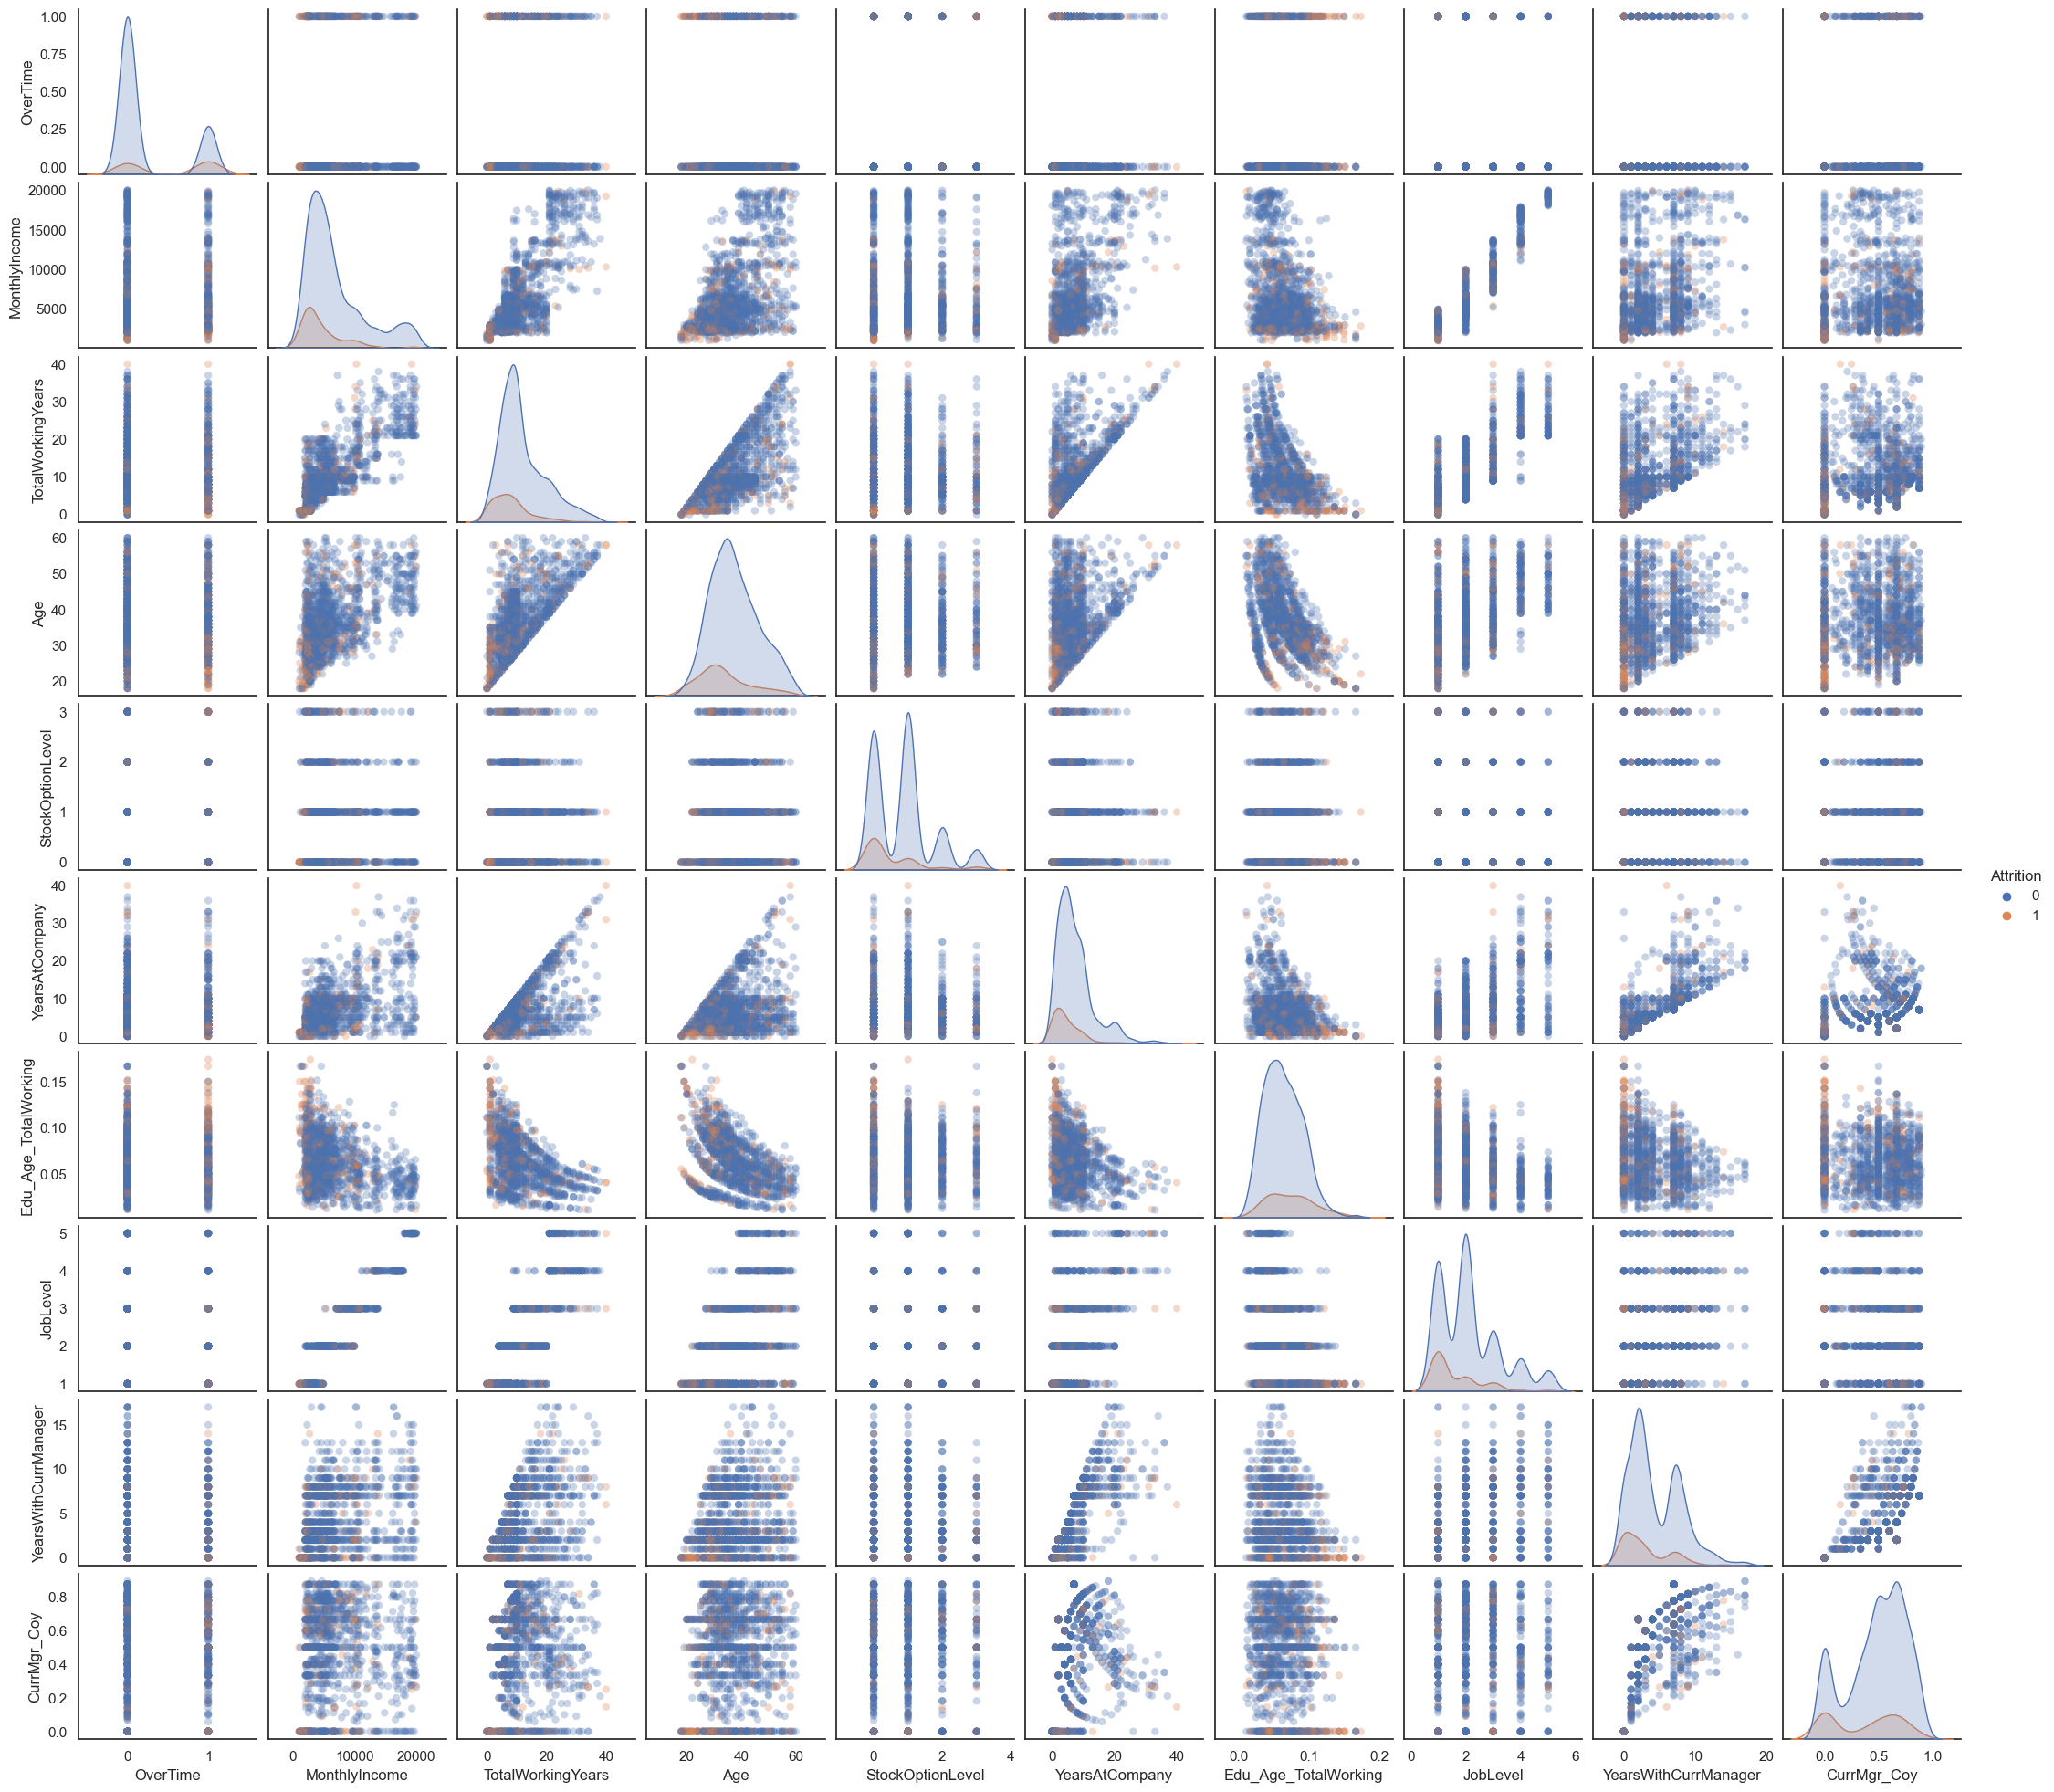

In [20]:
# to visualise pair plot of top 10 features
sns.pairplot(df_top10, hue='Attrition', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

In [22]:
# define feature X and target y dataset (X and y are commonly used in sklearn)
X, y = df.drop('Attrition', axis=1), df['Attrition']
print('X', X.shape, 'y', y.shape)

# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

# kf = KFold(n_splits=5, shuffle=True, random_state=SEED)   # this may result in imbalance classes in each fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)   # use this

X (1470, 29) y (1470,)
X_train (1176, 29)
y_train (1176,)
X_test (294, 29)
y_test (294,)


In [35]:
## BASELINE model performance evaluation
# to define which metric and model to use
met = {'accuracy':True, 'precision':True, 'recall':True, 'f1score':True, 'rocauc':True, 'logloss':True}
mod = {'gnb':True, 'bnb':True, 'mnb':True, 'logr':True, 'knn':True, 'dt':True, 'rf':True, 'xgb':False, 'svc':True, 'lsvc':True}

# to give model baseline performance report in dataframe 
def metric(model, X_train, X_test, y_train, y_test, name):
    accuracy1 = accuracy2 = precision = recall = f1score = rocauc = logloss = 0.0
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if met['accuracy']:
        accuracy1 = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
        accuracy2 = accuracy_score(y_test, y_pred)
    if met['precision']: precision = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    if met['recall']:    recall    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    if met['f1score']:   f1score   = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    if met['rocauc']:    rocauc    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    if met['logloss']:   logloss   = log_loss(y_test, y_pred)   # SVC & LinearSVC unable to use cvs

    return pd.DataFrame({'model'    : [name],
                         'accuracy' : [accuracy1],
                         'acc(test)': [accuracy2],
                         'precision': [precision],
                         'recall'   : [recall],
                         'f1score'  : [f1score],
                         'rocauc'   : [rocauc],
                         'logloss'  : [logloss],
                         'timetaken': [0.0]       })   # timetaken: to be used for comparison later

# to initialise an empty dataframe
rpt = pd.DataFrame({'model'    : [],
                    'accuracy' : [],
                    'acc(test)': [],
                    'precision': [],
                    'recall'   : [],
                    'f1score'  : [],
                    'rocauc'   : [],
                    'logloss'  : [],
                    'timetaken': []       })

# to initialise all baseline models
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
logr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
svc = SVC()
lsvc = LinearSVC()

if mod['gnb']:  rpt = pd.concat([rpt, metric(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')])   # default axis=0
if mod['bnb']:  rpt = pd.concat([rpt, metric(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB')])
if mod['mnb']:  rpt = pd.concat([rpt, metric(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB')])
if mod['logr']: rpt = pd.concat([rpt, metric(logr, X_train, X_test, y_train, y_test, 'LogisticRegression')])
if mod['knn']:  rpt = pd.concat([rpt, metric(knn, X_train, X_test, y_train, y_test, 'KNearestNeighbour')])
if mod['dt']:   rpt = pd.concat([rpt, metric(dt, X_train, X_test, y_train, y_test, 'DecisionTree')])
if mod['rf']:   rpt = pd.concat([rpt, metric(rf, X_train, X_test, y_train, y_test, 'RandomForest')])
if mod['xgb']:  rpt = pd.concat([rpt, metric(xgb, X_train, X_test, y_train, y_test, 'XGBoost')])
if mod['svc']:  rpt = pd.concat([rpt, metric(svc, X_train, X_test, y_train, y_test, 'SVC')])
if mod['lsvc']: rpt = pd.concat([rpt, metric(lsvc, X_train, X_test, y_train, y_test, 'LinearSVC')])
rpt = rpt.reset_index(drop=True)
display(rpt)

## TUNED model performance evaluation
def tuning(model, X_train, X_test, y_train, y_test, name):
    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')
    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                   np.linspace(optimal_th-0.1,    optimal_th+0.1,    21), 
                   np.linspace(optimal_th-0.01,   optimal_th+0.01,   21)]
        for th in th_list[i]:
            if th<0: 
                score_list.append(-1)
                continue
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display f1score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print('\n', name, 'accuracy score is')
    accuracy1 = model.score(X_train, y_train)   # .score uses accuracy
    print('Training: {:.2f}%'.format(100*accuracy1))
    accuracy2 = model.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy2))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

    y_pred = model.predict(X_test)
    print('Default threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('Adjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
#     y_pred = [1 if x==True else 0 if x==False else x for x in y_pred]   # .predict->0/1; .predict_proba->False/True
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred)
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(precision, recall, f1score))
    print(name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    y_pred = model.predict_proba(X_test)[:,1]   # use this at optimal th, for AUC and logloss
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    print(name, 'AUC: {:.4f}'.format(rocauc))
    logloss      = log_loss(y_test, y_pred)   # same result using y_pred = model.predict_proba(X_test)
    print(name, 'Log-loss: {:.4f}'.format(logloss))

    return pd.DataFrame({'model'    : [name],
                         'accuracy' : [accuracy1],
                         'acc(test)': [accuracy2],
                         'precision': [precision],
                         'recall'   : [recall],
                         'f1score'  : [f1score],
                         'rocauc'   : [rocauc],
                         'logloss'  : [logloss],
                         'timetaken': [1000]       })   # timetaken: to be used for comparison late

# to initialise an empty dataframe
tuned = pd.DataFrame({'model'    : [],
                    'accuracy' : [],
                    'acc(test)': [],
                    'precision': [],
                    'recall'   : [],
                    'f1score'  : [],
                    'rocauc'   : [],
                    'logloss'  : [],
                    'timetaken': []       })

if mod['gnb']:
    print('\n"""""" GaussianNB """"""')
    time1 = time.time()
    gnb = GaussianNB()
    model_tuned = tuning(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0

if mod['bnb']:
    print('\n"""""" BernoulliNB """"""')
    time1 = time.time()
    bnb = BernoulliNB()
    model_tuned = tuning(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0

if mod['mnb']:
    print('\n"""""" MultinomialNB """"""')
    time1 = time.time()
    mnb = MultinomialNB()
    model_tuned = tuning(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0

if mod['logr']:
    print('\n"""""" LogisticRegression """"""')
    time1 = time.time()
    print('\nSearch for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold CV on train data')
    score_list = []
    c_list = 10**np.linspace(-3,3,200)
    for c in c_list:
        logr = LogisticRegression(C = c)
        cvs = (cross_val_score(logr, X_train, y_train, cv=kf, scoring='f1')).mean()
        score_list.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")   # 4 decimal pl
    print('optimal cv F1 score = {:.4f}'.format(max(score_list)))
    optimal_c = float(c_list[score_list.index(max(score_list))])
    print('optimal value of C = {:.3f}'.format(optimal_c))
    logr = LogisticRegression(C = optimal_c)
    model_tuned = tuning(logr, X_train, X_test, y_train, y_test, 'LogisticRegression')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['knn']:
    print('\n"""""" KNN """""" ')
    time1 = time.time()
    print('\nSearch for optimal hyperparameter K in KNN, vary K from 1 to 20, using KFold CV on train data')
    k_scores = []
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors = k)
        cvs = cross_val_score(knn, X_train, y_train, cv=kf, scoring='f1').mean()
        k_scores.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")
    print('optimal cv F1 score = {:.4f}'.format(max(k_scores)))   # 4 decimal pl
    optimal_k = k_scores.index(max(k_scores)) + 1   # index 0 is for k=1
    print('optimal value of K =', optimal_k)
    knn = KNeighborsClassifier(n_neighbors = optimal_k)
    model_tuned = tuning(knn, X_train, X_test, y_train, y_test, 'KNearestNeighbour')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['dt']:
    print('\n"""""" DecisionTreeClassifier """"""')
    time1 = time.time()
    print('\nSearch for optimal max_depth in DecisionTree, vary from 2 to 10, using KFold CV on train data')
    d_scores = []
    for d in range(2, 11):
        dt = DecisionTreeClassifier(max_depth=d, random_state=SEED)
        cvs = cross_val_score(dt, X_train, y_train, cv=kf, scoring='f1').mean()
        d_scores.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")
    print('optimal F1 score = {:.4f}'.format(max(d_scores)))   # 4 decimal pl
    optimal_d = d_scores.index(max(d_scores)) + 2   # index 0 is for d=2
    print('optimal max_depth =', optimal_d)
    dt = DecisionTreeClassifier(max_depth=optimal_d, random_state=SEED)
    model_tuned = tuning(dt, X_train, X_test, y_train, y_test, 'DecisionTree')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    # Note: results keep changing in each run
    
if mod['rf']:
    print('\n"""""" RandomForestClassifier """""" (quite slow)')
    time1 = time.time()
    print('\nSearch for optimal n_estimators in RandomForest, vary from 100 to 500, using KFold CV on train data')
    score_list = []
    n_list = [100, 150, 200, 250, 300, 350, 400, 450, 500]
    for n in n_list:
        rf = RandomForestClassifier(n_estimators=n)
        cvs = (cross_val_score(rf, X_train, y_train, cv=kf, scoring='f1')).mean()
        score_list.append(cvs)
        print('{:.0f}->{:.4f}'.format(n, cvs), end=", ")   # display score in 4 decimal place
    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    optimal_n = int(n_list[score_list.index(max(score_list))])
    print('optimal n_estimators = {:.0f}'.format(optimal_n))
    rf = RandomForestClassifier(n_estimators=optimal_n)
    model_tuned = tuning(rf, X_train, X_test, y_train, y_test, 'RandomForest')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    # Note: results keep changing in each run
    
if mod['xgb']:
    print('\n"""""" XGBClassifier """""" (quite slow)')
    time1 = time.time()
    print('\nSearch for optimal n_estimators in XGBClassifier, vary from 100 to 500, using KFold CV on train data')
    score_list = []
    n_list = [100, 150, 200, 250, 300, 350, 400, 450, 500]
    for n in n_list:
        xgb = XGBClassifier(n_estimators=n)
        cvs = (cross_val_score(xgb, X_train, y_train, cv=kf, scoring='f1')).mean()
        score_list.append(cvs)
        print('{:.0f}->{:.4f}'.format(n, cvs), end=", ")   # display score in 4 decimal place
    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    optimal_n = int(n_list[score_list.index(max(score_list))])
    print('optimal n_estimators = {:.0f}'.format(optimal_n))
    print('\nSearch for optimal max_depth in XGBClassifier, vary from 2 to 10, using KFold CV on train data')
    d_scores = []
    for d in range(2, 11):
        xgb = XGBClassifier(n_estimators=optimal_n, max_depth=d)
        cvs = cross_val_score(xgb, X_train, y_train, cv=kf, scoring='f1').mean()
        d_scores.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")
    print('optimal F1 score = {:.4f}'.format(max(d_scores)))   # 4 decimal pl
    optimal_d = d_scores.index(max(d_scores)) + 2   # index 0 is for d=2
    print('optimal max_depth =', optimal_d)
    xgb = XGBClassifier(n_estimators=optimal_n, max_depth=optimal_d)
    model_tuned = tuning(xgb, X_train, X_test, y_train, y_test, 'XGBoost')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['svc']:
    print('\n"""""" SVC """"""')
    time1 = time.time()
    svc = SVC(gamma='scale', probability=True)
    model_tuned = tuning(svc, X_train, X_test, y_train, y_test, 'SVC')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['lsvc']:
    print('\n"""""" LinearSVC """"""')
    time1 = time.time()
    lsvc = LinearSVC()    # model has no attribute 'predict_proba'
    lsvc.fit(X_train, y_train)
    print('LinearSVC accuracy score is')
    accuracy1 = lsvc.score(X_train, y_train)   # .score uses accuracy
    print('Training: {:.2f}%'.format(100*accuracy1))
    accuracy2 = lsvc.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy2))
    y_pred = lsvc.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('LinearSVC confusion matrix: \n', confusion_matrix(y_test, y_pred))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred) 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    logloss      = log_loss(y_test, y_pred)
    print('LinearSVC AUC: {:.4f}'.format(rocauc))
    print('LinearSVC Log-loss: {:.4f}'.format(logloss))
    tuned = pd.concat([tuned, pd.DataFrame({'model'    : ['LinearSVC'],
                                            'accuracy' : [accuracy1],
                                            'acc(test)': [accuracy2],
                                            'precision': [precision],
                                            'recall'   : [recall],
                                            'f1score'  : [f1score],
                                            'rocauc'   : [rocauc],
                                            'logloss'  : [logloss],
                                            'timetaken': [time.time() - time1] }) ])   # default axis=0
tuned = tuned.reset_index(drop=True)

,model,accuracy,acc(test),precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,0.801692,0.704082,0.786871,0.827585,0.806334,0.884706,10.665979,0.0
1,BernoulliNB,0.718027,0.602041,0.695669,0.775840,0.733516,0.762516,14.343903,0.0
2,MultinomialNB,0.577052,0.496599,0.572315,0.607522,0.589018,0.599222,18.144424,0.0
3,LogisticRegression,0.725645,0.717687,0.736431,0.704892,0.719877,0.788887,10.175589,0.0
4,KNearestNeighbour,0.763668,0.612245,0.720214,0.866103,0.786071,0.842299,13.976110,0.0
5,DecisionTree,0.802728,0.687075,0.785145,0.835666,0.812860,0.805261,11.278966,0.0
6,RandomForest,0.910745,0.823129,0.931779,0.885366,0.906651,0.960804,6.375068,0.0
7,SVC,0.608486,0.513605,0.588542,0.716018,0.645758,0.670379,17.531437,0.0
8,LinearSVC,0.549700,0.843537,0.446049,0.366497,0.523012,0.530805,5.639483,0.0



"""""" GaussianNB """"""

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.2786,  0.100->0.3107,  0.200->0.3111,  0.300->0.3152,  0.400->0.3243,  0.500->0.3359,  0.600->0.3559,  0.700->0.4200,  0.800->0.4000,  0.900->0.2933,  1.000->0.0000,  
Looping decimal place 2
0.600->0.3559,  0.610->0.3559,  0.620->0.3652,  0.630->0.3717,  0.640->0.3750,  0.650->0.3853,  0.660->0.3925,  0.670->0.4000,  0.680->0.4038,  0.690->0.4118,  0.700->0.4200,  0.710->0.4082,  0.720->0.4082,  0.730->0.4167,  0.740->0.4255,  0.750->0.4255,  0.760->0.4301,  0.770->0.4348,  0.780->0.4348,  0.790->0.4348,  0.800->0.4000,  
Looping decimal place 3
0.760->0.4301,  0.761->0.4301,  0.762->0.4301,  0.763->0.4301,  0.764->0.4301,  0.765->0.4301,  0.766->0.4301,  0.767->0.4301,  0.768->0.4301,  0.769->0.4348,  0.770->0.4348,  0.771->0.4348,  0.772->0.4348,  0.773->0.4348,  0.774->0.4348,  0.775->0.4348,  0.776->0.4348,  0.777->0.4348,  0.778->0.

0.8339, 0.7797, 0.8070, 0.7756, 0.7861, 0.7695, 0.7777, 0.7548, 0.7689, 0.7556, 0.7596, 0.7464, 0.7531, 0.7405, 0.7462, 0.7390, 0.7387, 0.7378, 0.7406, 0.7369, optimal cv F1 score = 0.8339
optimal value of K = 1

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.2520,  0.100->0.2520,  0.200->0.2520,  0.300->0.2520,  0.400->0.2520,  0.500->0.2520,  0.600->0.2520,  0.700->0.2520,  0.800->0.2520,  0.900->0.2520,  1.000->0.2520,  
Looping decimal place 2
0.000->0.2520,  0.010->0.2520,  0.020->0.2520,  0.030->0.2520,  0.040->0.2520,  0.050->0.2520,  0.060->0.2520,  0.070->0.2520,  0.080->0.2520,  0.090->0.2520,  0.100->0.2520,  
Looping decimal place 3
0.000->0.2520,  0.001->0.2520,  0.002->0.2520,  0.003->0.2520,  0.004->0.2520,  0.005->0.2520,  0.006->0.2520,  0.007->0.2520,  0.008->0.2520,  0.009->0.2520,  0.010->0.2520,  optimal F1 score = 0.2520
optimal threshold = 0.000

 KNearestNeighbour accuracy score is
Train

In [28]:
print('Baseline model performance:')
display(rpt)
print('After tuning hyperparameters:')
display(tuned)

# initialise an empty df for comparison: 1 = improved, 0 = no improvement
print('Comparison: 1 = improved, 0 = no improvement')
n = rpt.shape[0]
df_compare = pd.DataFrame({'model':[0]*n, 'accuracy':[0]*n, 'acc(test)':[0]*n, 'precision':[0]*n, 'recall':[0]*n,
                           'f1score':[0]*n, 'rocauc':[0]*n, 'logloss':[0]*n, 'timetaken':[0]*n})
df_compare.model = rpt.model
for i in range(1,7):
    for j in range(n):
        if tuned[tuned.columns[i]][j] >= rpt[rpt.columns[i]][j]:
            df_compare[df_compare.columns[i]][j] = 1
for i in range(7,9):
    for j in range(n):
        if tuned[tuned.columns[i]][j] <= rpt[rpt.columns[i]][j]:
            df_compare[df_compare.columns[i]][j] = 1
display(df_compare)

Baseline model performance:


,model,accuracy,acc(test),precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,0.855438,0.853741,0.607686,0.284211,0.385750,0.764906,5.271691,0.0
1,BernoulliNB,0.841818,0.799320,0.545631,0.273684,0.352139,0.751134,7.233250,0.0
2,MultinomialNB,0.540804,0.489796,0.196815,0.600000,0.296207,0.592191,18.389619,0.0
3,LogisticRegression,0.838435,0.840136,0.000000,0.000000,0.000000,0.695732,5.762081,0.0
4,KNearestNeighbour,0.815467,0.819728,0.315971,0.105263,0.155330,0.616914,6.497665,0.0
5,DecisionTree,0.790811,0.778912,0.347631,0.300000,0.344062,0.595515,7.968835,0.0
6,RandomForest,0.856307,0.843537,0.827778,0.178947,0.283144,0.786601,5.639483,0.0
7,SVC,0.838435,0.840136,0.000000,0.000000,0.000000,0.523540,5.762081,0.0
8,LinearSVC,0.722690,0.693878,0.081747,0.505263,0.166608,0.618806,11.033771,0.0


After tuning hyperparameters:


,model,accuracy,acc(test),precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,0.870748,0.853741,0.545455,0.382979,0.450000,0.738306,0.414125,0.144017
1,BernoulliNB,0.846088,0.799320,0.288000,0.765957,0.418605,0.711948,0.451211,0.141538
2,MultinomialNB,0.544218,0.489796,0.181250,0.617021,0.280193,0.559652,18.175029,0.109537
3,LogisticRegression,0.838435,0.840136,0.288660,0.595745,0.388889,0.673529,0.414107,16.695399
4,KNearestNeighbour,1.000000,0.744898,0.208333,0.212766,0.210526,0.529460,9.194810,5.748780
5,DecisionTree,0.976190,0.809524,0.425532,0.425532,0.425532,0.643165,4.839130,0.439143
6,RandomForest,1.000000,0.840136,0.456140,0.553191,0.500000,0.784434,0.374616,25.538017
7,SVC,0.838435,0.840136,0.173077,0.957447,0.293160,0.460074,0.444007,0.846675
8,LinearSVC,0.838435,0.840136,0.000000,0.000000,0.000000,0.500000,5.762081,0.068525


Comparison: 1 = improved, 0 = no improvement


,model,accuracy,acc(test),precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,1,1,0,1,1,0,1,0
1,BernoulliNB,1,1,0,1,1,0,1,0
2,MultinomialNB,1,1,0,1,0,0,1,0
3,LogisticRegression,1,1,1,1,1,0,1,0
4,KNearestNeighbour,1,0,0,1,1,0,0,0
5,DecisionTree,1,1,1,1,1,1,1,0
6,RandomForest,1,0,0,1,1,0,1,0
7,SVC,1,1,1,1,1,0,1,0
8,LinearSVC,1,1,0,0,0,0,1,0


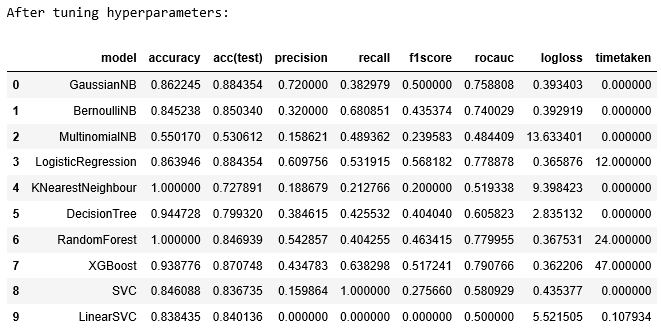

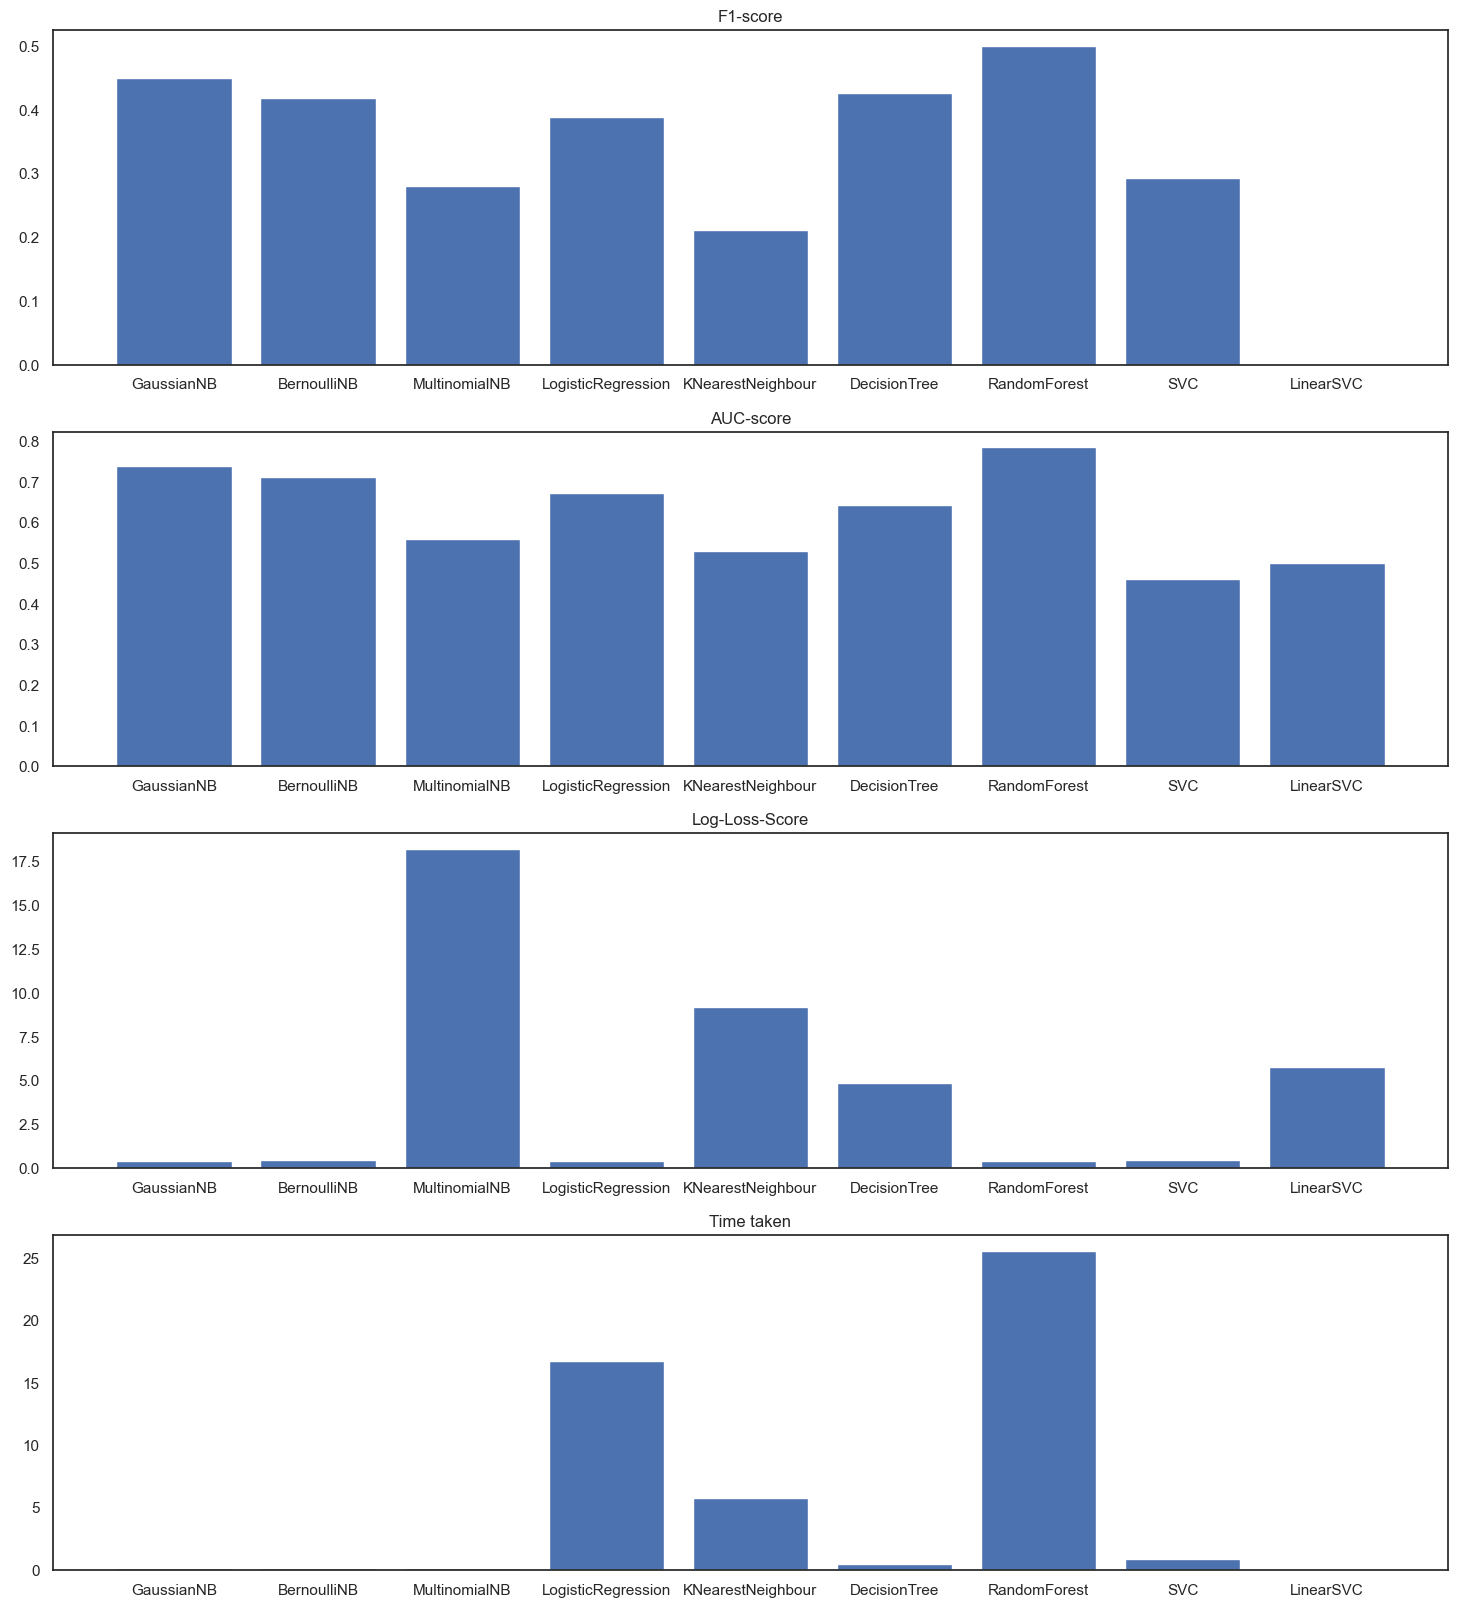

In [29]:
## plot the performance metric scores
fig, ax = plt.subplots(4, 1, figsize=(18, 20))

ax[0].bar(tuned.model, tuned.f1score)
ax[0].set_title('F1-score')

ax[1].bar(tuned.model, tuned.rocauc)
ax[1].set_title('AUC-score')

ax[2].bar(tuned.model, tuned.logloss)
ax[2].set_title('Log-Loss-Score')

ax[3].bar(tuned.model, tuned.timetaken)
ax[3].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.2, wspace=0.2)

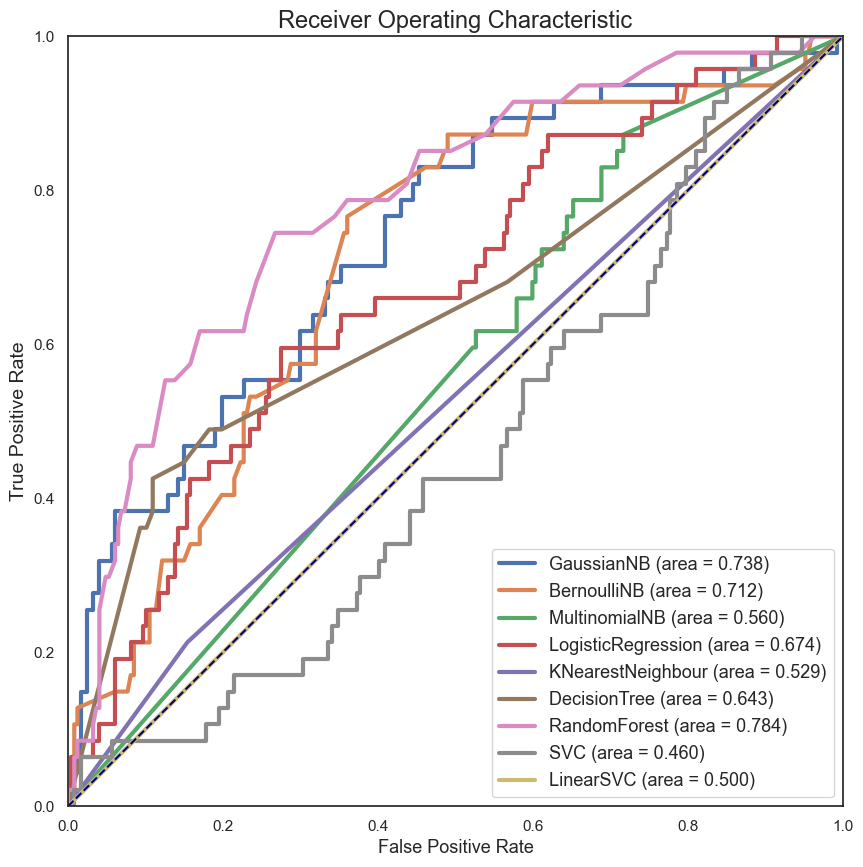

In [30]:
# plot the ROC curves
plt.figure(figsize=(10,10))

# model_name = [gnb, bnb, mnb, logr, knn, dt, rf, xgb, svc, lsvc]
model_name = [gnb, bnb, mnb, logr, knn, dt, rf, svc, lsvc]

for i in range(len(model_name)-1):
    y_pred = model_name[i].predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, lw=3, label=tuned.model[i] + ' (area = %0.3f)' % auc(fpr, tpr))

y_pred = lsvc.predict(X_test)   # linearsvc has no attribute 'predict_proba'
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, lw=3, label='LinearSVC (area = %0.3f)' % auc(fpr, tpr))

plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

In [31]:
# see how model confusion matrix varies with threshold
bestmodel = rf

def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (bestmodel.predict(X_test) is done automatically with a threshold of 0.5)
    y_pred = (bestmodel.predict_proba(X_test)[:, 1] >= threshold)
    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = [5,5])
    sns.heatmap(conf, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['no attrition', 'attrition'],
           yticklabels=['no attrition', 'attrition']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
# Let's see how the confusion matrix changes with changes to the threshold 
from ipywidgets import interactive, FloatSlider
# bestmodel = LogisticRegression(C = optimal_c)
# bestmodel.fit(X_train, y_train)
interactive(lambda threshold: make_confusion_matrix(bestmodel, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

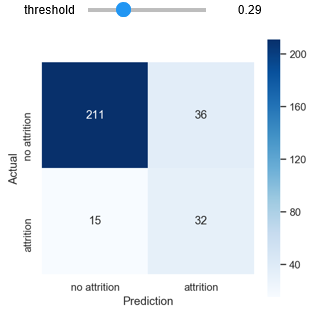

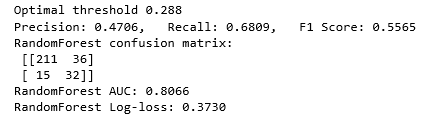

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create SMOTE object
sm = SMOTE(random_state=SEED)

# Apply SMOTE to resample the data
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Check the shape of resampled data
print('\nAfter SMOTE over-sampling X_train_sm.shape:', X_train_sm.shape)
print(pd.value_counts(pd.Series(y_train_sm)))

# Fit the model on resampled data
bestmodel_sm = bestmodel.fit(X_train_sm, y_train_sm)

# Make predictions on test data
y_pred = bestmodel_sm.predict(X_test)

# Evaluate model performance after over-sampling
print('Model accuracy is', accuracy_score(y_test, y_pred))
print('Model accuracy is', bestmodel_sm.score(X_test, y_test))   # same results (.score uses accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



After SMOTE over-sampling X_train_sm.shape: (1972, 29)
Attrition
0    986
1    986
Name: count, dtype: int64
Model accuracy is 0.8299319727891157
Model accuracy is 0.8299319727891157
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       247
           1       0.45      0.28      0.34        47

    accuracy                           0.83       294
   macro avg       0.66      0.61      0.62       294
weighted avg       0.80      0.83      0.81       294

[[231  16]
 [ 34  13]]


In [34]:
X_train = X_train_sm
y_train = y_train_sm

In [ ]:
## BASELINE model performance evaluation
# to define which metric and model to use
met = {'accuracy':True, 'precision':True, 'recall':True, 'f1score':True, 'rocauc':True, 'logloss':True}
mod = {'gnb':True, 'bnb':True, 'mnb':True, 'logr':True, 'knn':True, 'dt':True, 'rf':True, 'xgb':False, 'svc':True, 'lsvc':True}

# to give model baseline performance report in dataframe 
def metric(model, X_train, X_test, y_train, y_test, name):
    accuracy1 = accuracy2 = precision = recall = f1score = rocauc = logloss = 0.0
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if met['accuracy']:
        accuracy1 = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
        accuracy2 = accuracy_score(y_test, y_pred)
    if met['precision']: precision = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    if met['recall']:    recall    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    if met['f1score']:   f1score   = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    if met['rocauc']:    rocauc    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    if met['logloss']:   logloss   = log_loss(y_test, y_pred)   # SVC & LinearSVC unable to use cvs

    return pd.DataFrame({'model'    : [name],
                         'accuracy' : [accuracy1],
                         'acc(test)': [accuracy2],
                         'precision': [precision],
                         'recall'   : [recall],
                         'f1score'  : [f1score],
                         'rocauc'   : [rocauc],
                         'logloss'  : [logloss],
                         'timetaken': [0.0]       })   # timetaken: to be used for comparison later

# to initialise an empty dataframe
rpt = pd.DataFrame({'model'    : [],
                    'accuracy' : [],
                    'acc(test)': [],
                    'precision': [],
                    'recall'   : [],
                    'f1score'  : [],
                    'rocauc'   : [],
                    'logloss'  : [],
                    'timetaken': []       })

# to initialise all baseline models
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
logr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

svc = SVC()
lsvc = LinearSVC()

if mod['gnb']:  rpt = pd.concat([rpt, metric(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')])   # default axis=0
if mod['bnb']:  rpt = pd.concat([rpt, metric(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB')])
if mod['mnb']:  rpt = pd.concat([rpt, metric(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB')])
if mod['logr']: rpt = pd.concat([rpt, metric(logr, X_train, X_test, y_train, y_test, 'LogisticRegression')])
if mod['knn']:  rpt = pd.concat([rpt, metric(knn, X_train, X_test, y_train, y_test, 'KNearestNeighbour')])
if mod['dt']:   rpt = pd.concat([rpt, metric(dt, X_train, X_test, y_train, y_test, 'DecisionTree')])
if mod['rf']:   rpt = pd.concat([rpt, metric(rf, X_train, X_test, y_train, y_test, 'RandomForest')])

if mod['svc']:  rpt = pd.concat([rpt, metric(svc, X_train, X_test, y_train, y_test, 'SVC')])
if mod['lsvc']: rpt = pd.concat([rpt, metric(lsvc, X_train, X_test, y_train, y_test, 'LinearSVC')])
rpt = rpt.reset_index(drop=True)
display(rpt)

## TUNED model performance evaluation
def tuning(model, X_train, X_test, y_train, y_test, name):
    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')
    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                   np.linspace(optimal_th-0.1,    optimal_th+0.1,    21), 
                   np.linspace(optimal_th-0.01,   optimal_th+0.01,   21)]
        for th in th_list[i]:
            if th<0: 
                score_list.append(-1)
                continue
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display f1score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print('\n', name, 'accuracy score is')
    accuracy1 = model.score(X_train, y_train)   # .score uses accuracy
    print('Training: {:.2f}%'.format(100*accuracy1))
    accuracy2 = model.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy2))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

    y_pred = model.predict(X_test)
    print('Default threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('Adjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
#     y_pred = [1 if x==True else 0 if x==False else x for x in y_pred]   # .predict->0/1; .predict_proba->False/True
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred)
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(precision, recall, f1score))
    print(name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    y_pred = model.predict_proba(X_test)[:,1]   # use this at optimal th, for AUC and logloss
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    print(name, 'AUC: {:.4f}'.format(rocauc))
    logloss      = log_loss(y_test, y_pred)   # same result using y_pred = model.predict_proba(X_test)
    print(name, 'Log-loss: {:.4f}'.format(logloss))

    return pd.DataFrame({'model'    : [name],
                         'accuracy' : [accuracy1],
                         'acc(test)': [accuracy2],
                         'precision': [precision],
                         'recall'   : [recall],
                         'f1score'  : [f1score],
                         'rocauc'   : [rocauc],
                         'logloss'  : [logloss],
                         'timetaken': [1000]       })   # timetaken: to be used for comparison late

# to initialise an empty dataframe
tuned = pd.DataFrame({'model'    : [],
                    'accuracy' : [],
                    'acc(test)': [],
                    'precision': [],
                    'recall'   : [],
                    'f1score'  : [],
                    'rocauc'   : [],
                    'logloss'  : [],
                    'timetaken': []       })

if mod['gnb']:
    print('\n"""""" GaussianNB """"""')
    time1 = time.time()
    gnb = GaussianNB()
    model_tuned = tuning(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0

if mod['bnb']:
    print('\n"""""" BernoulliNB """"""')
    time1 = time.time()
    bnb = BernoulliNB()
    model_tuned = tuning(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0

if mod['mnb']:
    print('\n"""""" MultinomialNB """"""')
    time1 = time.time()
    mnb = MultinomialNB()
    model_tuned = tuning(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0

if mod['logr']:
    print('\n"""""" LogisticRegression """"""')
    time1 = time.time()
    print('\nSearch for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold CV on train data')
    score_list = []
    c_list = 10**np.linspace(-3,3,200)
    for c in c_list:
        logr = LogisticRegression(C = c)
        cvs = (cross_val_score(logr, X_train, y_train, cv=kf, scoring='f1')).mean()
        score_list.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")   # 4 decimal pl
    print('optimal cv F1 score = {:.4f}'.format(max(score_list)))
    optimal_c = float(c_list[score_list.index(max(score_list))])
    print('optimal value of C = {:.3f}'.format(optimal_c))
    logr = LogisticRegression(C = optimal_c)
    model_tuned = tuning(logr, X_train, X_test, y_train, y_test, 'LogisticRegression')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['knn']:
    print('\n"""""" KNN """""" ')
    time1 = time.time()
    print('\nSearch for optimal hyperparameter K in KNN, vary K from 1 to 20, using KFold CV on train data')
    k_scores = []
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors = k)
        cvs = cross_val_score(knn, X_train, y_train, cv=kf, scoring='f1').mean()
        k_scores.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")
    print('optimal cv F1 score = {:.4f}'.format(max(k_scores)))   # 4 decimal pl
    optimal_k = k_scores.index(max(k_scores)) + 1   # index 0 is for k=1
    print('optimal value of K =', optimal_k)
    knn = KNeighborsClassifier(n_neighbors = optimal_k)
    model_tuned = tuning(knn, X_train, X_test, y_train, y_test, 'KNearestNeighbour')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['dt']:
    print('\n"""""" DecisionTreeClassifier """"""')
    time1 = time.time()
    print('\nSearch for optimal max_depth in DecisionTree, vary from 2 to 10, using KFold CV on train data')
    d_scores = []
    for d in range(2, 11):
        dt = DecisionTreeClassifier(max_depth=d, random_state=SEED)
        cvs = cross_val_score(dt, X_train, y_train, cv=kf, scoring='f1').mean()
        d_scores.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")
    print('optimal F1 score = {:.4f}'.format(max(d_scores)))   # 4 decimal pl
    optimal_d = d_scores.index(max(d_scores)) + 2   # index 0 is for d=2
    print('optimal max_depth =', optimal_d)
    dt = DecisionTreeClassifier(max_depth=optimal_d, random_state=SEED)
    model_tuned = tuning(dt, X_train, X_test, y_train, y_test, 'DecisionTree')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    # Note: results keep changing in each run
    
if mod['rf']:
    print('\n"""""" RandomForestClassifier """""" (quite slow)')
    time1 = time.time()
    print('\nSearch for optimal n_estimators in RandomForest, vary from 100 to 500, using KFold CV on train data')
    score_list = []
    n_list = [100, 150, 200, 250, 300, 350, 400, 450, 500]
    for n in n_list:
        rf = RandomForestClassifier(n_estimators=n)
        cvs = (cross_val_score(rf, X_train, y_train, cv=kf, scoring='f1')).mean()
        score_list.append(cvs)
        print('{:.0f}->{:.4f}'.format(n, cvs), end=", ")   # display score in 4 decimal place
    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    optimal_n = int(n_list[score_list.index(max(score_list))])
    print('optimal n_estimators = {:.0f}'.format(optimal_n))
    rf = RandomForestClassifier(n_estimators=optimal_n)
    model_tuned = tuning(rf, X_train, X_test, y_train, y_test, 'RandomForest')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    # Note: results keep changing in each run
    

    
if mod['svc']:
    print('\n"""""" SVC """"""')
    time1 = time.time()
    svc = SVC(gamma='scale', probability=True)
    model_tuned = tuning(svc, X_train, X_test, y_train, y_test, 'SVC')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['lsvc']:
    print('\n"""""" LinearSVC """"""')
    time1 = time.time()
    lsvc = LinearSVC()    # model has no attribute 'predict_proba'
    lsvc.fit(X_train, y_train)
    print('LinearSVC accuracy score is')
    accuracy1 = lsvc.score(X_train, y_train)   # .score uses accuracy
    print('Training: {:.2f}%'.format(100*accuracy1))
    accuracy2 = lsvc.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy2))
    y_pred = lsvc.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('LinearSVC confusion matrix: \n', confusion_matrix(y_test, y_pred))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred) 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    logloss      = log_loss(y_test, y_pred)
    print('LinearSVC AUC: {:.4f}'.format(rocauc))
    print('LinearSVC Log-loss: {:.4f}'.format(logloss))
    tuned = pd.concat([tuned, pd.DataFrame({'model'    : ['LinearSVC'],
                                            'accuracy' : [accuracy1],
                                            'acc(test)': [accuracy2],
                                            'precision': [precision],
                                            'recall'   : [recall],
                                            'f1score'  : [f1score],
                                            'rocauc'   : [rocauc],
                                            'logloss'  : [logloss],
                                            'timetaken': [time.time() - time1] }) ])   # default axis=0
tuned = tuned.reset_index(drop=True)

In [36]:
## BASELINE model performance evaluation
# to define which metric and model to use
met = {'accuracy':True, 'precision':True, 'recall':True, 'f1score':True, 'rocauc':True, 'logloss':True}
mod = {'gnb':True, 'bnb':True, 'mnb':True, 'logr':True, 'knn':True, 'dt':True, 'rf':True, 'xgb':False, 'svc':True, 'lsvc':True}

# to give model baseline performance report in dataframe 
def metric(model, X_train, X_test, y_train, y_test, name):
    accuracy1 = accuracy2 = precision = recall = f1score = rocauc = logloss = 0.0
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if met['accuracy']:
        accuracy1 = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
        accuracy2 = accuracy_score(y_test, y_pred)
    if met['precision']: precision = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    if met['recall']:    recall    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    if met['f1score']:   f1score   = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    if met['rocauc']:    rocauc    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    if met['logloss']:   logloss   = log_loss(y_test, y_pred)   # SVC & LinearSVC unable to use cvs

    return pd.DataFrame({'model'    : [name],
                         'accuracy' : [accuracy1],
                         'acc(test)': [accuracy2],
                         'precision': [precision],
                         'recall'   : [recall],
                         'f1score'  : [f1score],
                         'rocauc'   : [rocauc],
                         'logloss'  : [logloss],
                         'timetaken': [0.0]       })   # timetaken: to be used for comparison later

# to initialise an empty dataframe
rpt = pd.DataFrame({'model'    : [],
                    'accuracy' : [],
                    'acc(test)': [],
                    'precision': [],
                    'recall'   : [],
                    'f1score'  : [],
                    'rocauc'   : [],
                    'logloss'  : [],
                    'timetaken': []       })

# to initialise all baseline models
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
logr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
svc = SVC()
lsvc = LinearSVC()

if mod['gnb']:  rpt = pd.concat([rpt, metric(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')])   # default axis=0
if mod['bnb']:  rpt = pd.concat([rpt, metric(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB')])
if mod['mnb']:  rpt = pd.concat([rpt, metric(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB')])
if mod['logr']: rpt = pd.concat([rpt, metric(logr, X_train, X_test, y_train, y_test, 'LogisticRegression')])
if mod['knn']:  rpt = pd.concat([rpt, metric(knn, X_train, X_test, y_train, y_test, 'KNearestNeighbour')])
if mod['dt']:   rpt = pd.concat([rpt, metric(dt, X_train, X_test, y_train, y_test, 'DecisionTree')])
if mod['rf']:   rpt = pd.concat([rpt, metric(rf, X_train, X_test, y_train, y_test, 'RandomForest')])
if mod['xgb']:  rpt = pd.concat([rpt, metric(xgb, X_train, X_test, y_train, y_test, 'XGBoost')])
if mod['svc']:  rpt = pd.concat([rpt, metric(svc, X_train, X_test, y_train, y_test, 'SVC')])
if mod['lsvc']: rpt = pd.concat([rpt, metric(lsvc, X_train, X_test, y_train, y_test, 'LinearSVC')])
rpt = rpt.reset_index(drop=True)
display(rpt)

## TUNED model performance evaluation
def tuning(model, X_train, X_test, y_train, y_test, name):
    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')
    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                   np.linspace(optimal_th-0.1,    optimal_th+0.1,    21), 
                   np.linspace(optimal_th-0.01,   optimal_th+0.01,   21)]
        for th in th_list[i]:
            if th<0: 
                score_list.append(-1)
                continue
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display f1score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print('\n', name, 'accuracy score is')
    accuracy1 = model.score(X_train, y_train)   # .score uses accuracy
    print('Training: {:.2f}%'.format(100*accuracy1))
    accuracy2 = model.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy2))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

    y_pred = model.predict(X_test)
    print('Default threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('Adjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
#     y_pred = [1 if x==True else 0 if x==False else x for x in y_pred]   # .predict->0/1; .predict_proba->False/True
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred)
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(precision, recall, f1score))
    print(name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    y_pred = model.predict_proba(X_test)[:,1]   # use this at optimal th, for AUC and logloss
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    print(name, 'AUC: {:.4f}'.format(rocauc))
    logloss      = log_loss(y_test, y_pred)   # same result using y_pred = model.predict_proba(X_test)
    print(name, 'Log-loss: {:.4f}'.format(logloss))

    return pd.DataFrame({'model'    : [name],
                         'accuracy' : [accuracy1],
                         'acc(test)': [accuracy2],
                         'precision': [precision],
                         'recall'   : [recall],
                         'f1score'  : [f1score],
                         'rocauc'   : [rocauc],
                         'logloss'  : [logloss],
                         'timetaken': [1000]       })   # timetaken: to be used for comparison late

# to initialise an empty dataframe
tuned = pd.DataFrame({'model'    : [],
                    'accuracy' : [],
                    'acc(test)': [],
                    'precision': [],
                    'recall'   : [],
                    'f1score'  : [],
                    'rocauc'   : [],
                    'logloss'  : [],
                    'timetaken': []       })

if mod['gnb']:
    print('\n"""""" GaussianNB """"""')
    time1 = time.time()
    gnb = GaussianNB()
    model_tuned = tuning(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0

if mod['bnb']:
    print('\n"""""" BernoulliNB """"""')
    time1 = time.time()
    bnb = BernoulliNB()
    model_tuned = tuning(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0

if mod['mnb']:
    print('\n"""""" MultinomialNB """"""')
    time1 = time.time()
    mnb = MultinomialNB()
    model_tuned = tuning(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0

if mod['logr']:
    print('\n"""""" LogisticRegression """"""')
    time1 = time.time()
    print('\nSearch for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold CV on train data')
    score_list = []
    c_list = 10**np.linspace(-3,3,200)
    for c in c_list:
        logr = LogisticRegression(C = c)
        cvs = (cross_val_score(logr, X_train, y_train, cv=kf, scoring='f1')).mean()
        score_list.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")   # 4 decimal pl
    print('optimal cv F1 score = {:.4f}'.format(max(score_list)))
    optimal_c = float(c_list[score_list.index(max(score_list))])
    print('optimal value of C = {:.3f}'.format(optimal_c))
    logr = LogisticRegression(C = optimal_c)
    model_tuned = tuning(logr, X_train, X_test, y_train, y_test, 'LogisticRegression')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['knn']:
    print('\n"""""" KNN """""" ')
    time1 = time.time()
    print('\nSearch for optimal hyperparameter K in KNN, vary K from 1 to 20, using KFold CV on train data')
    k_scores = []
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors = k)
        cvs = cross_val_score(knn, X_train, y_train, cv=kf, scoring='f1').mean()
        k_scores.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")
    print('optimal cv F1 score = {:.4f}'.format(max(k_scores)))   # 4 decimal pl
    optimal_k = k_scores.index(max(k_scores)) + 1   # index 0 is for k=1
    print('optimal value of K =', optimal_k)
    knn = KNeighborsClassifier(n_neighbors = optimal_k)
    model_tuned = tuning(knn, X_train, X_test, y_train, y_test, 'KNearestNeighbour')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['dt']:
    print('\n"""""" DecisionTreeClassifier """"""')
    time1 = time.time()
    print('\nSearch for optimal max_depth in DecisionTree, vary from 2 to 10, using KFold CV on train data')
    d_scores = []
    for d in range(2, 11):
        dt = DecisionTreeClassifier(max_depth=d, random_state=SEED)
        cvs = cross_val_score(dt, X_train, y_train, cv=kf, scoring='f1').mean()
        d_scores.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")
    print('optimal F1 score = {:.4f}'.format(max(d_scores)))   # 4 decimal pl
    optimal_d = d_scores.index(max(d_scores)) + 2   # index 0 is for d=2
    print('optimal max_depth =', optimal_d)
    dt = DecisionTreeClassifier(max_depth=optimal_d, random_state=SEED)
    model_tuned = tuning(dt, X_train, X_test, y_train, y_test, 'DecisionTree')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    # Note: results keep changing in each run
    
if mod['rf']:
    print('\n"""""" RandomForestClassifier """""" (quite slow)')
    time1 = time.time()
    print('\nSearch for optimal n_estimators in RandomForest, vary from 100 to 500, using KFold CV on train data')
    score_list = []
    n_list = [100, 150, 200, 250, 300, 350, 400, 450, 500]
    for n in n_list:
        rf = RandomForestClassifier(n_estimators=n)
        cvs = (cross_val_score(rf, X_train, y_train, cv=kf, scoring='f1')).mean()
        score_list.append(cvs)
        print('{:.0f}->{:.4f}'.format(n, cvs), end=", ")   # display score in 4 decimal place
    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    optimal_n = int(n_list[score_list.index(max(score_list))])
    print('optimal n_estimators = {:.0f}'.format(optimal_n))
    rf = RandomForestClassifier(n_estimators=optimal_n)
    model_tuned = tuning(rf, X_train, X_test, y_train, y_test, 'RandomForest')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    # Note: results keep changing in each run
    
if mod['xgb']:
    print('\n"""""" XGBClassifier """""" (quite slow)')
    time1 = time.time()
    print('\nSearch for optimal n_estimators in XGBClassifier, vary from 100 to 500, using KFold CV on train data')
    score_list = []
    n_list = [100, 150, 200, 250, 300, 350, 400, 450, 500]
    for n in n_list:
        xgb = XGBClassifier(n_estimators=n)
        cvs = (cross_val_score(xgb, X_train, y_train, cv=kf, scoring='f1')).mean()
        score_list.append(cvs)
        print('{:.0f}->{:.4f}'.format(n, cvs), end=", ")   # display score in 4 decimal place
    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    optimal_n = int(n_list[score_list.index(max(score_list))])
    print('optimal n_estimators = {:.0f}'.format(optimal_n))
    print('\nSearch for optimal max_depth in XGBClassifier, vary from 2 to 10, using KFold CV on train data')
    d_scores = []
    for d in range(2, 11):
        xgb = XGBClassifier(n_estimators=optimal_n, max_depth=d)
        cvs = cross_val_score(xgb, X_train, y_train, cv=kf, scoring='f1').mean()
        d_scores.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")
    print('optimal F1 score = {:.4f}'.format(max(d_scores)))   # 4 decimal pl
    optimal_d = d_scores.index(max(d_scores)) + 2   # index 0 is for d=2
    print('optimal max_depth =', optimal_d)
    xgb = XGBClassifier(n_estimators=optimal_n, max_depth=optimal_d)
    model_tuned = tuning(xgb, X_train, X_test, y_train, y_test, 'XGBoost')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['svc']:
    print('\n"""""" SVC """"""')
    time1 = time.time()
    svc = SVC(gamma='scale', probability=True)
    model_tuned = tuning(svc, X_train, X_test, y_train, y_test, 'SVC')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['lsvc']:
    print('\n"""""" LinearSVC """"""')
    time1 = time.time()
    lsvc = LinearSVC()    # model has no attribute 'predict_proba'
    lsvc.fit(X_train, y_train)
    print('LinearSVC accuracy score is')
    accuracy1 = lsvc.score(X_train, y_train)   # .score uses accuracy
    print('Training: {:.2f}%'.format(100*accuracy1))
    accuracy2 = lsvc.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy2))
    y_pred = lsvc.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('LinearSVC confusion matrix: \n', confusion_matrix(y_test, y_pred))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred) 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    logloss      = log_loss(y_test, y_pred)
    print('LinearSVC AUC: {:.4f}'.format(rocauc))
    print('LinearSVC Log-loss: {:.4f}'.format(logloss))
    tuned = pd.concat([tuned, pd.DataFrame({'model'    : ['LinearSVC'],
                                            'accuracy' : [accuracy1],
                                            'acc(test)': [accuracy2],
                                            'precision': [precision],
                                            'recall'   : [recall],
                                            'f1score'  : [f1score],
                                            'rocauc'   : [rocauc],
                                            'logloss'  : [logloss],
                                            'timetaken': [time.time() - time1] }) ])   # default axis=0
tuned = tuned.reset_index(drop=True)

,model,accuracy,acc(test),precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,0.801692,0.704082,0.786871,0.827585,0.806334,0.884706,10.665979,0.0
1,BernoulliNB,0.718027,0.602041,0.695669,0.775840,0.733516,0.762516,14.343903,0.0
2,MultinomialNB,0.577052,0.496599,0.572315,0.607522,0.589018,0.599222,18.144424,0.0
3,LogisticRegression,0.725645,0.717687,0.736431,0.704892,0.719877,0.788887,10.175589,0.0
4,KNearestNeighbour,0.763668,0.612245,0.720214,0.866103,0.786071,0.842299,13.976110,0.0
5,DecisionTree,0.813887,0.690476,0.783473,0.841737,0.816678,0.806253,11.156369,0.0
6,RandomForest,0.906172,0.819728,0.927848,0.879295,0.905529,0.961700,6.497665,0.0
7,SVC,0.608486,0.513605,0.588542,0.716018,0.645758,0.670379,17.531437,0.0
8,LinearSVC,0.555214,0.272109,0.355643,0.481428,0.137624,0.576134,26.235857,0.0



"""""" GaussianNB """"""

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.2786,  0.100->0.3107,  0.200->0.3111,  0.300->0.3152,  0.400->0.3243,  0.500->0.3359,  0.600->0.3559,  0.700->0.4200,  0.800->0.4000,  0.900->0.2933,  1.000->0.0000,  
Looping decimal place 2
0.600->0.3559,  0.610->0.3559,  0.620->0.3652,  0.630->0.3717,  0.640->0.3750,  0.650->0.3853,  0.660->0.3925,  0.670->0.4000,  0.680->0.4038,  0.690->0.4118,  0.700->0.4200,  0.710->0.4082,  0.720->0.4082,  0.730->0.4167,  0.740->0.4255,  0.750->0.4255,  0.760->0.4301,  0.770->0.4348,  0.780->0.4348,  0.790->0.4348,  0.800->0.4000,  
Looping decimal place 3
0.760->0.4301,  0.761->0.4301,  0.762->0.4301,  0.763->0.4301,  0.764->0.4301,  0.765->0.4301,  0.766->0.4301,  0.767->0.4301,  0.768->0.4301,  0.769->0.4348,  0.770->0.4348,  0.771->0.4348,  0.772->0.4348,  0.773->0.4348,  0.774->0.4348,  0.775->0.4348,  0.776->0.4348,  0.777->0.4348,  0.778->0.

0.8339, 0.7797, 0.8070, 0.7756, 0.7861, 0.7695, 0.7777, 0.7548, 0.7689, 0.7556, 0.7596, 0.7464, 0.7531, 0.7405, 0.7462, 0.7390, 0.7387, 0.7378, 0.7406, 0.7369, optimal cv F1 score = 0.8339
optimal value of K = 1

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.2520,  0.100->0.2520,  0.200->0.2520,  0.300->0.2520,  0.400->0.2520,  0.500->0.2520,  0.600->0.2520,  0.700->0.2520,  0.800->0.2520,  0.900->0.2520,  1.000->0.2520,  
Looping decimal place 2
0.000->0.2520,  0.010->0.2520,  0.020->0.2520,  0.030->0.2520,  0.040->0.2520,  0.050->0.2520,  0.060->0.2520,  0.070->0.2520,  0.080->0.2520,  0.090->0.2520,  0.100->0.2520,  
Looping decimal place 3
0.000->0.2520,  0.001->0.2520,  0.002->0.2520,  0.003->0.2520,  0.004->0.2520,  0.005->0.2520,  0.006->0.2520,  0.007->0.2520,  0.008->0.2520,  0.009->0.2520,  0.010->0.2520,  optimal F1 score = 0.2520
optimal threshold = 0.000

 KNearestNeighbour accuracy score is
Train

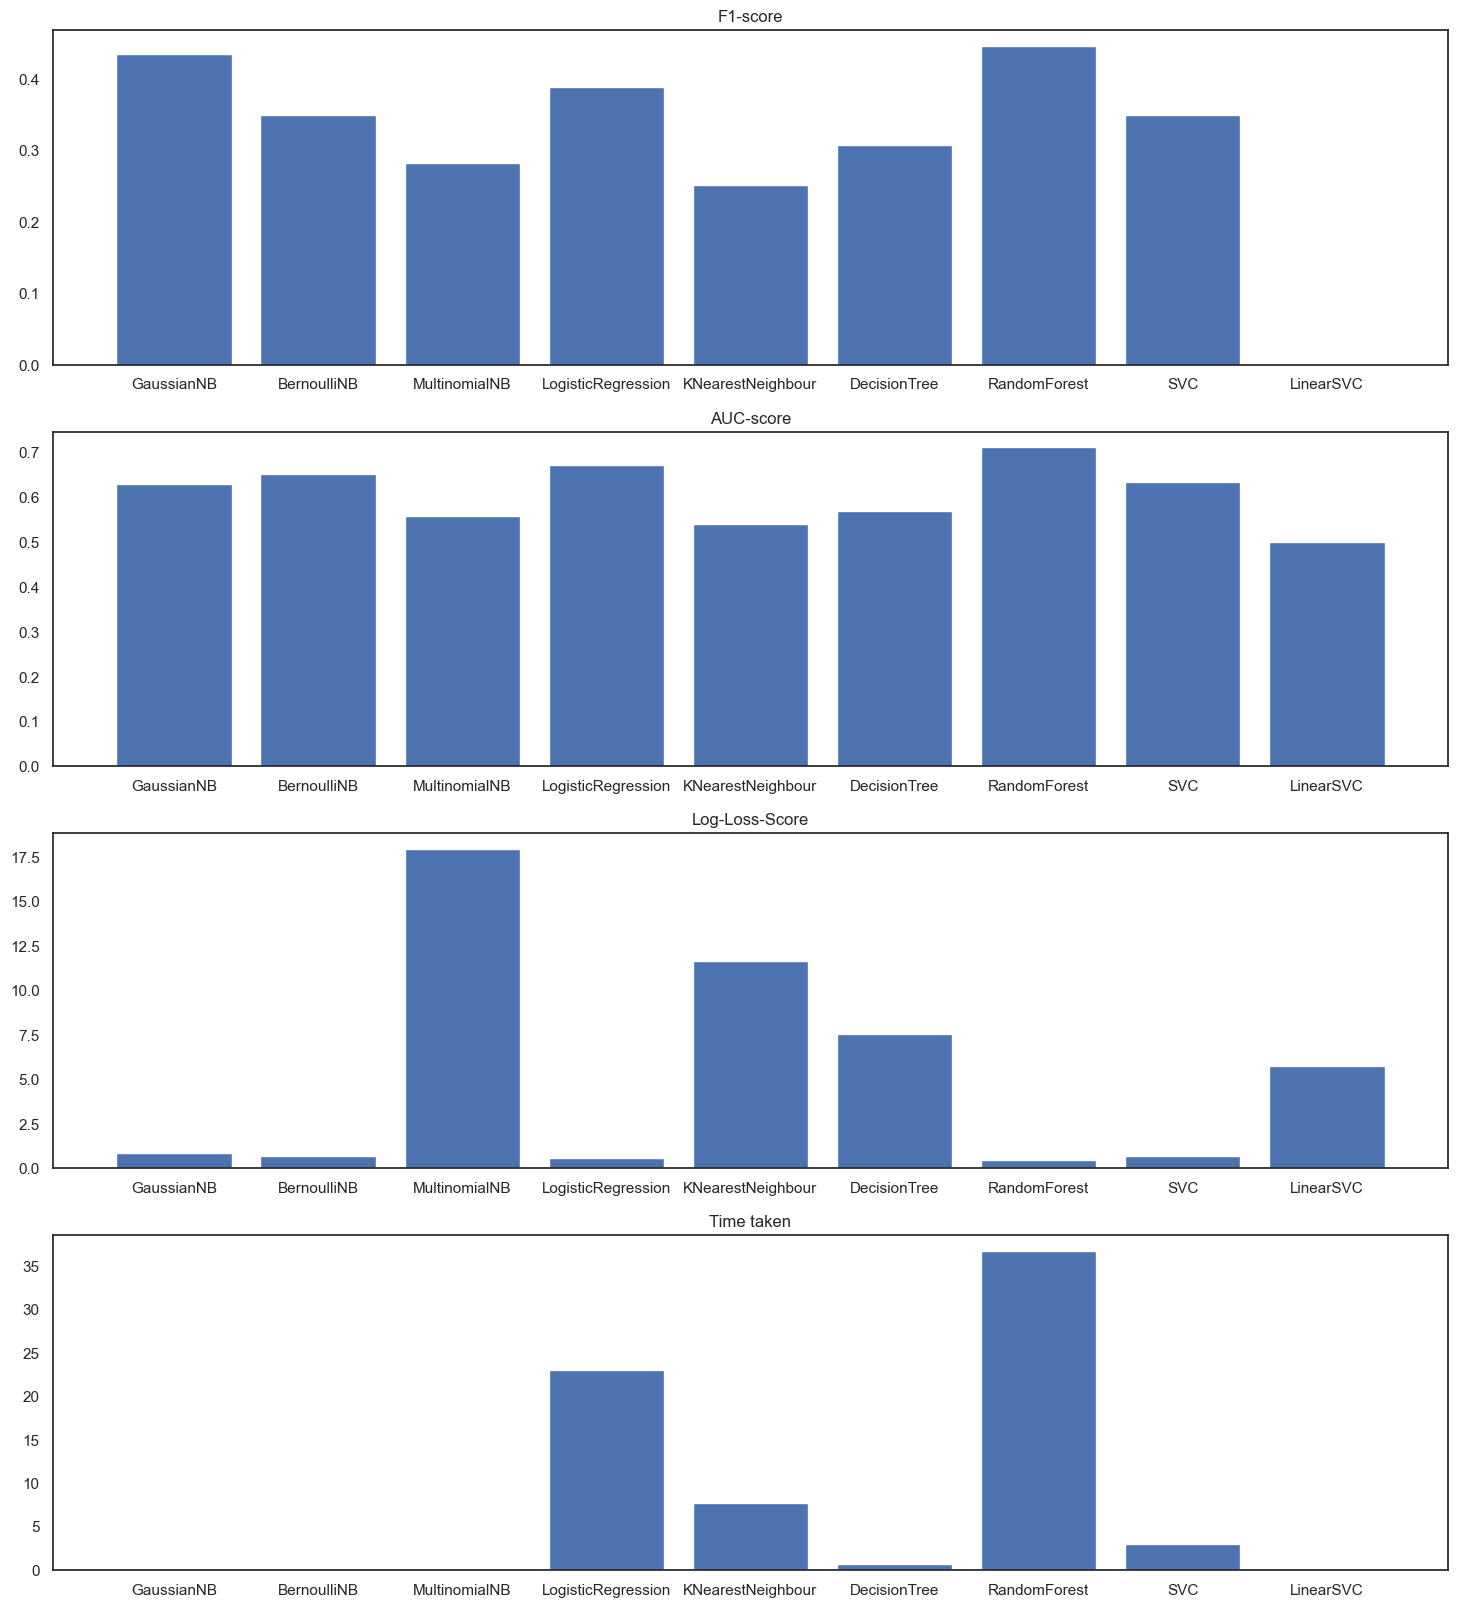

In [37]:
## plot the performance metric scores
fig, ax = plt.subplots(4, 1, figsize=(18, 20))

ax[0].bar(tuned.model, tuned.f1score)
ax[0].set_title('F1-score')

ax[1].bar(tuned.model, tuned.rocauc)
ax[1].set_title('AUC-score')

ax[2].bar(tuned.model, tuned.logloss)
ax[2].set_title('Log-Loss-Score')

ax[3].bar(tuned.model, tuned.timetaken)
ax[3].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.2, wspace=0.2)